In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir='data/'
ddict = {mod:{} for mod in ['CM4','ESM4']}

for mod in ddict:
    dset = '_control_global_0281to0380_' if mod=='CM4' else '_control_global_0121to0220_'
    ddict[mod]['psiz'] = xr.open_dataset(datadir+mod+dset+'moc_rho2_online_mean_lores_reprojected.nc').psi
    ddict[mod]['sig2'] = xr.open_dataset(datadir+mod+dset+'sigma2_jmd95_zmean.nc').sigma2
    
ddict['CM4']['psi'] = xr.open_dataset(datadir+'CM4_control_global_0251to0405_moc_rho2_online_lores.nc').psi
ddict['ESM4']['psi'] = xr.open_dataset(datadir+'ESM4_control_global_0101to0270_moc_rho2_online_lores.nc').psi

In [3]:
contours = np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)])

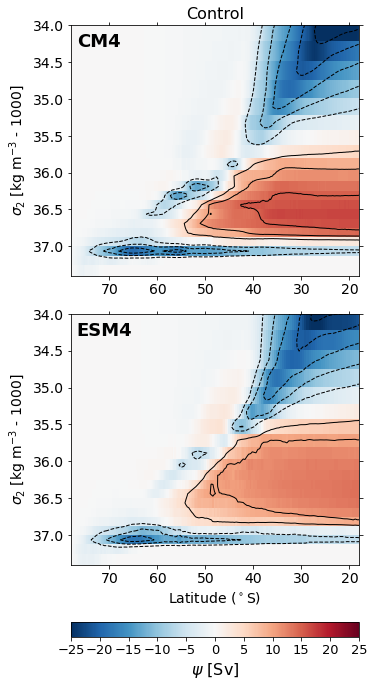

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(5,10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.15)

for i, mod in enumerate(ddict):
    
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        
    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    p = smoc_mean.plot(ax=axs[i], yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r', 
                       add_colorbar=False, add_labels=False)
    smoc_mean.plot.contour(ax=axs[i], yincrease=False, levels=contours, colors='k', linewidths=1, add_labels=False)
    axs[i].set_xlim([-78,-18])
    axs[i].set_ylim([37.4,34.0])
    axs[i].set_xticks(np.arange(-70,-10,10))
    axs[i].set_xticklabels(np.arange(70,10,-10))
    axs[i].set_yticks(np.arange(37.0,33.5,-0.5))
    axs[i].tick_params(axis='both', which='both', labelsize=14,top=True,right=True)
    axs[i].set_ylabel(r'$\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=14)


axs[0].set_title('Control',fontsize=16)
axs[1].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
axs[0].text(0.02, 0.97, 'CM4', ha='left', va='top', fontsize=18, fontweight='bold',
                transform=axs[0].transAxes)
axs[1].text(0.02, 0.97, 'ESM4', ha='left', va='top', fontsize=18, fontweight='bold',
                transform=axs[1].transAxes)

cax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
cb = fig.colorbar(p, cax=cax, ticks=np.arange(-25,30,5), orientation='horizontal', shrink=0.9, pad=0.02)
cb.set_label(r'$\psi$ [Sv]', fontsize=16)
cb.ax.tick_params(labelsize=13)

plt.show()

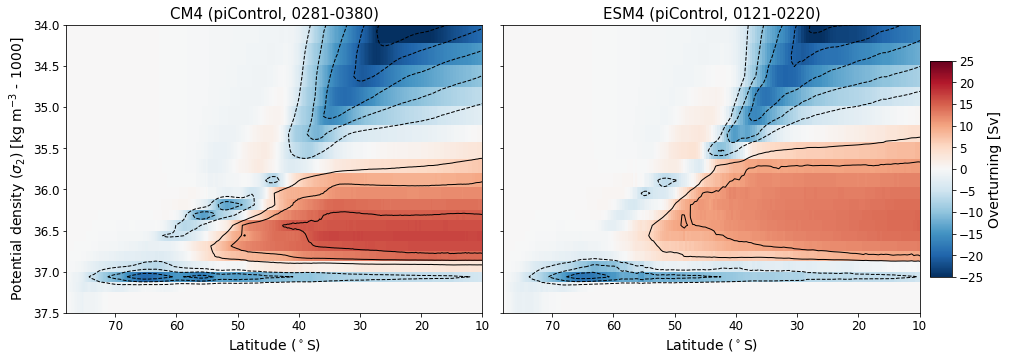

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.1, wspace=0.05)

for i, mod in enumerate(ddict):
    
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        
    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    p = smoc_mean.plot(ax=axs[i], yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r', 
                       add_colorbar=False, add_labels=False)
    smoc_mean.plot.contour(ax=axs[i], yincrease=False, levels=contours, colors='k', linewidths=1, add_labels=False)
    axs[i].set_xlim([-78,-10])
    axs[i].set_ylim([37.5,34.0])
    axs[i].set_xticks(np.arange(-70,0,10))
    axs[i].set_xticklabels(np.arange(70,0,-10))
    axs[i].set_yticks(np.arange(37.5,33.5,-0.5))
    axs[i].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
    axs[i].tick_params(axis='both', which='both', labelsize=12)

axs[0].set_title('CM4 (piControl, 0281-0380)',fontsize=15)
axs[1].set_title('ESM4 (piControl, 0121-0220)',fontsize=15)
axs[0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=14)

cax = fig.add_axes([0.9, 0.2, 0.02, 0.60])
cb = fig.colorbar(p, cax=cax, ticks=np.arange(-25,30,5), orientation='vertical', shrink=0.9, pad=0.02)
cb.set_label(r'Overturning [Sv]', fontsize=14)
cb.ax.tick_params(labelsize=12)

plt.show()

### Figure 3

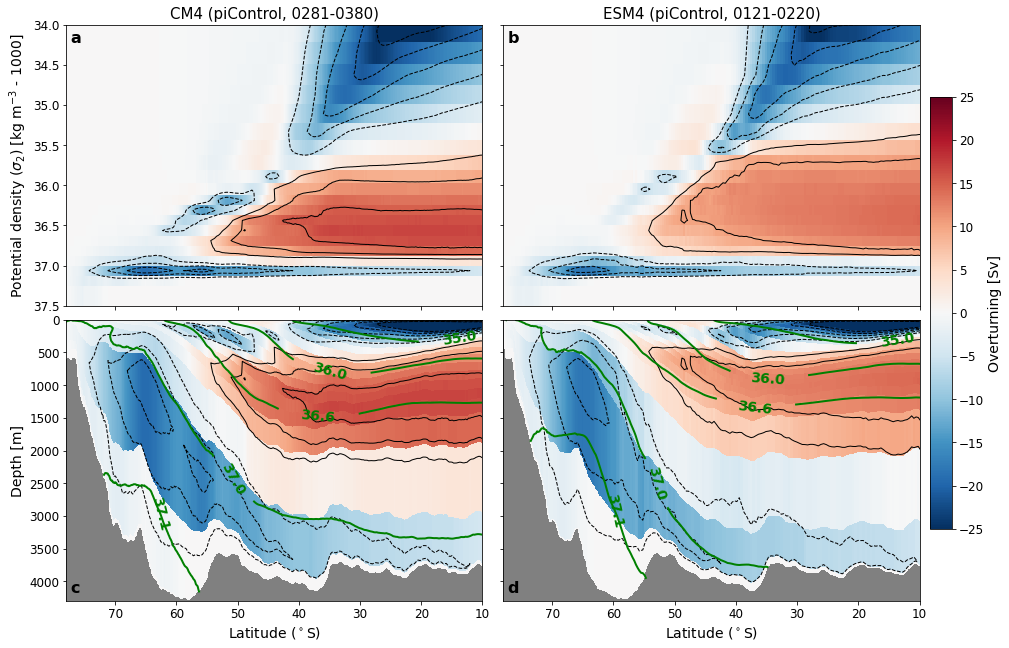

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.05, wspace=0.05)

for i, mod in enumerate(ddict):
    
    ### Isopycnal overturning in density space
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
        
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        
    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    p = smoc_mean.plot(ax=axs[0,i], yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r', 
                       add_colorbar=False, add_labels=False)
    smoc_mean.plot.contour(ax=axs[0,i], yincrease=False, levels=contours, colors='k', linewidths=1, add_labels=False)
    axs[0,i].set_xlim([-78,-10])
    axs[0,i].set_ylim([37.5,34.0])
    axs[0,i].set_xticks(np.arange(-70,0,10))
    axs[0,i].set_xticklabels([])
    axs[0,i].set_yticks(np.arange(37.5,33.5,-0.5))
    axs[0,i].tick_params(axis='both', which='both', labelsize=12)
    axs[0,0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=14)
    
    ### Isopycnal overturning reprojected to depth space
    p = ddict[mod]['psiz'].plot(ax=axs[1,i],x='yq', y='depth', yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r',
                                add_colorbar=False, add_labels=False)
    ddict[mod]['psiz'].plot.contour(ax=axs[1,i],x='yq', y='depth', yincrease=False, levels=contours, 
                                    colors='k', linewidths=1, add_labels=False)
    
    cs = ddict[mod]['sig2'].plot.contour(ax=axs[1,i], x='yq', y='lev',yincrease=False,colors='g',linewidths=2,
                                         levels=[35.0, 36.0,36.6], add_labels=False)
    clab = axs[1,i].clabel(cs, cs.levels, inline=True, fmt='%1.1f', fontsize=14,
                         manual=[(-14,200),(-35,800), (-37,1500)],inline_spacing=1)
    [txt.set_fontweight('bold') for txt in clab]
    
    if mod=='CM4':
        cs1 = ddict[mod]['sig2'].plot.contour(ax=axs[1,i], x='yq', y='lev',yincrease=False,colors='g',linewidths=2,
                                             levels=[37.0], add_labels=False)
        cs2 = ddict[mod]['sig2'].sel(yq=slice(-72,-56.2)).plot.contour(ax=axs[1,i], x='yq', y='lev',yincrease=False,
                                                                     colors='g',linewidths=2,levels=[37.1], 
                                                                       add_labels=False)
    else:
        cs1 = ddict[mod]['sig2'].sel(yq=slice(None,-34.5)).plot.contour(ax=axs[1,i], x='yq', y='lev',yincrease=False,
                                                                      colors='g',linewidths=2,levels=[37.0], 
                                                                      add_labels=False)
        cs2 = ddict[mod]['sig2'].sel(yq=slice(-73.7,-54.5)).plot.contour(ax=axs[1,i], x='yq', y='lev',yincrease=False,
                                                                     colors='g',linewidths=2,levels=[37.1], 
                                                                     add_labels=False)
        
    clab1 = axs[1,i].clabel(cs1, cs1.levels, inline=True, fmt='%1.1f', fontsize=14,
                            manual=[(-53,2500)],inline_spacing=1)
    [txt.set_fontweight('bold') for txt in clab1]
    clab2 = axs[1,i].clabel(cs2, cs2.levels, inline=False, fmt='%1.1f', fontsize=14, manual=[(-65,3000)])
    [txt.set_fontweight('bold') for txt in clab2]
    axs[1,i].set_xlim((-78,-10))
    axs[1,i].set_ylim((4300,0))
    axs[1,i].set_xticks(np.arange(-70,0,10))
    axs[1,i].set_xticklabels(np.arange(70,0,-10))
    axs[1,i].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
    axs[1,i].tick_params(axis='both', which='both', labelsize=12)
    axs[1,i].set_facecolor('gray')
    axs[1,0].set_ylabel(r'Depth [m]',fontsize=14)

axs[0,1].set_yticklabels([])
axs[1,1].set_yticklabels([])
axs[0,0].set_title('CM4 (piControl, 0281-0380)',fontsize=15)
axs[0,1].set_title('ESM4 (piControl, 0121-0220)',fontsize=15)

cax = fig.add_axes([0.9, 0.2, 0.02, 0.60])
cb = fig.colorbar(p, cax=cax, ticks=np.arange(-25,30,5), orientation='vertical', shrink=0.9, pad=0.02)
cb.set_label(r'Overturning [Sv]', fontsize=14)
cb.ax.tick_params(labelsize=12)

axs[0,0].text(0.01, 0.98, 'a', ha='left', va='top', fontsize=16, fontweight='bold',
                transform=axs[0,0].transAxes)
axs[0,1].text(0.01, 0.98, 'b', ha='left', va='top', fontsize=16, fontweight='bold',
                transform=axs[0,1].transAxes)
axs[1,0].text(0.01, 0.02, 'c', ha='left', va='bottom', fontsize=16, fontweight='bold',
                transform=axs[1,0].transAxes)
axs[1,1].text(0.01, 0.02, 'd', ha='left', va='bottom', fontsize=16, fontweight='bold',
                transform=axs[1,1].transAxes)

plt.savefig('smoc_ctrl.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)

plt.show()

**Figure 3**: Overturning streamfunction ($\Psi$) in the Southern Ocean (south of 10$^\circ$S) in the CM4 (0.25$^\circ$) and ESM4 (0.5$^\circ$) Control runs time-averaged over 100-year periods (model years 0281-0380 for CM4 and 0121-0220 for ESM4). Overturning circulation is presented in terms of volume transport (1 Sv = 10$^6$ m$^3$s$^{-1}$). Upper panels (a) and (b) show overturning circulation along surfaces of constant density (i.e., isopycnal overturning). Density space is presented in potential density referenced to 2000 dbar ($\sigma_2$) and here shown over the range 34 to 37.5 kg m$^{-3}$, which comprise the density range found in the SO (south of 30$^\circ$S). Lower panels (c) and (d) show overturning circulation as a function of zonal mean depth of the $\sigma_2$ surfaces. We also present some zonal mean potential density contours (green contours) for context. In all panels, positive $\Psi$ (red shading) indicates clockwise circulation and negative $\Psi$ (blue shading) indicates counterclockwise circulation. Black contours represent the streamfunction in 5 Sv increments and outline the different overturning cells.

### Overturning in depth coordinates

In [7]:
ddict['CM4']['psi_z'] = xr.open_dataset(datadir+'CM4_control_global_0251to0405_moc_z.nc').psi
ddict['ESM4']['psi_z'] = xr.open_dataset(datadir+'ESM4_control_global_0101to0300_moc_z.nc').psi

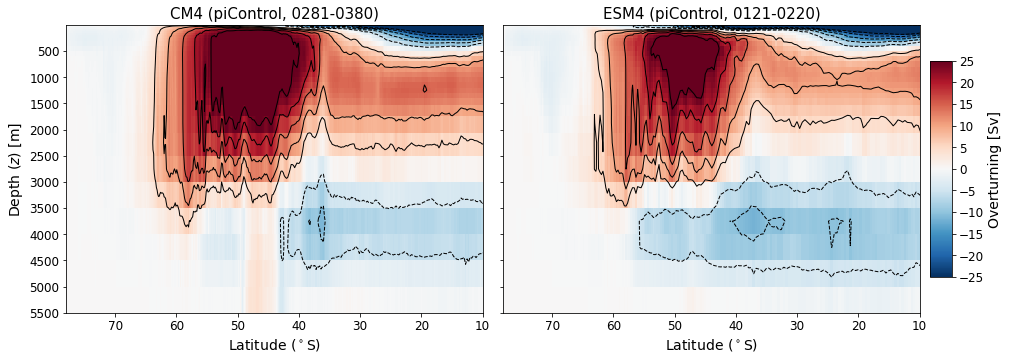

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.1, wspace=0.05)

for i, mod in enumerate(ddict):
    
    smoc = ddict[mod]['psi_z'].sel(lev_outer=slice(0,5500),yq=slice(None,0))
    
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
    
    p = smoc_mean.plot(ax=axs[i], yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r', 
                       add_colorbar=False, add_labels=False)
    smoc_mean.plot.contour(ax=axs[i], yincrease=False, levels=contours, colors='k', linewidths=1, add_labels=False)
    axs[i].set_xlim([-78,-10])
    axs[i].set_ylim([5500,0])
    axs[i].set_xticks(np.arange(-70,0,10))
    axs[i].set_xticklabels(np.arange(70,0,-10))
    axs[i].set_yticks(np.arange(5500,0,-500))
    axs[i].set_xlabel('Latitude ($^\circ$S)',fontsize=14)
    axs[i].tick_params(axis='both', which='both', labelsize=12)

axs[0].set_title('CM4 (piControl, 0281-0380)',fontsize=15)
axs[1].set_title('ESM4 (piControl, 0121-0220)',fontsize=15)
axs[0].set_ylabel(r'Depth ($z$) [m]',fontsize=14)

cax = fig.add_axes([0.9, 0.2, 0.02, 0.60])
cb = fig.colorbar(p, cax=cax, ticks=np.arange(-25,30,5), orientation='vertical', shrink=0.9, pad=0.02)
cb.set_label(r'Overturning [Sv]', fontsize=14)
cb.ax.tick_params(labelsize=12)
plt.show()